In [48]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
import seaborn as sns


Open Dataset in Pandas Dataframe

In [64]:
df = pd.read_csv("heart_disease.csv")
target = df.pop('HeartDiseaseorAttack')

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [19]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2)

In [20]:
# Convert the data into a format that can be used by TensorFlow
X_train = tf.convert_to_tensor(X_train.values, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train.values, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test.values, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test.values, dtype=tf.float32)

In [21]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [22]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
6342/6342 [==============================] - 16s 2ms/step - loss: 0.2543 - accuracy: 0.9054
Epoch 2/10
6342/6342 [==============================] - 15s 2ms/step - loss: 0.2447 - accuracy: 0.9071
Epoch 3/10
6342/6342 [==============================] - 15s 2ms/step - loss: 0.2423 - accuracy: 0.9075
Epoch 4/10
6342/6342 [==============================] - 15s 2ms/step - loss: 0.2406 - accuracy: 0.9077
Epoch 5/10
6342/6342 [==============================] - 15s 2ms/step - loss: 0.2396 - accuracy: 0.9076
Epoch 6/10
6342/6342 [==============================] - 15s 2ms/step - loss: 0.2394 - accuracy: 0.9078
Epoch 7/10
6342/6342 [==============================] - 15s 2ms/step - loss: 0.2388 - accuracy: 0.9079
Epoch 8/10
6342/6342 [==============================] - 16s 3ms/step - loss: 0.2385 - accuracy: 0.9079
Epoch 9/10
6342/6342 [==============================] - 15s 2ms/step - loss: 0.2382 - accuracy: 0.9080
Epoch 10/10
6342/6342 [==============================] - 15s 2ms/step - l

In [24]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

1586/1586 [==============================] - 3s 2ms/step - loss: 0.2402 - accuracy: 0.9075


In [25]:
predictions = model.predict(X_test)
# Convert the predictions to a binary class
predictions = (predictions > 0.5).astype(int)
predictions = [pred[0] for pred in predictions]
predictions = np.array(predictions)

1586/1586 [==============================] - 3s 2ms/step


In [26]:
y_true = y_test.numpy().astype(int)
test_acc = sum(predictions == y_true) / len(y_true)
Hc = sum(y_true == 0)
Sick = sum(y_true == 1)
PredHc = sum(predictions == 0)
PredSick = sum(predictions == 1)
print("Subjects:", len(y_true))
print("Actual Healthy Subjects:", Hc)
print("Actual Sick Subjects:", Sick)
print("Predicted Healthy Subjects:", Hc)
print("Predicted Sick Subjects:", Sick)
print("Test Set Accuracy:", test_acc)

Subjects: 50736
Actual Healthy Subjects: 45938
Actual Sick Subjects: 4798
Predicted Healthy Subjects: 45938
Predicted Sick Subjects: 4798
Test Set Accuracy: 0.907481866918953


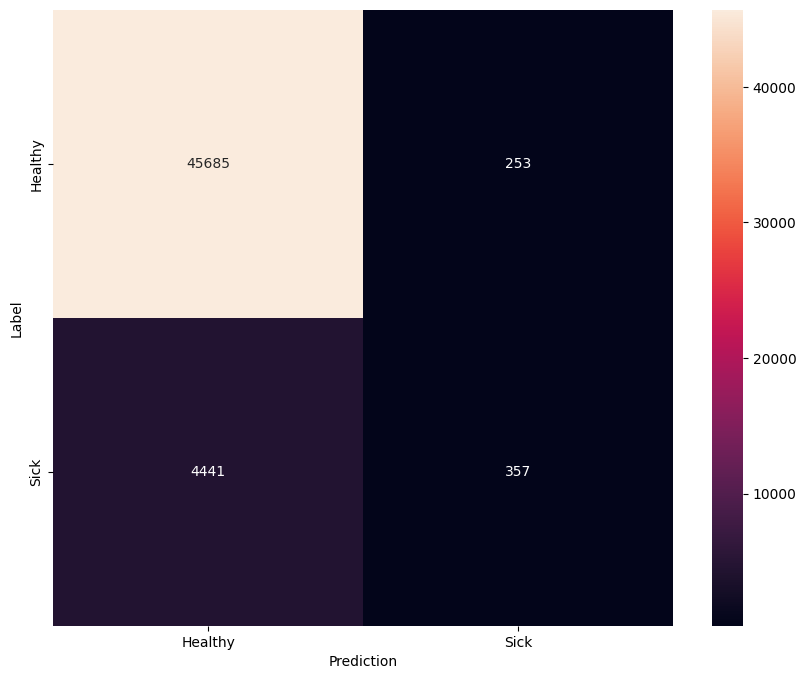

In [27]:
confusion_mtx = tf.math.confusion_matrix(y_test, predictions)
matriz = confusion_mtx.numpy()
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx,
xticklabels=['Healthy', 'Sick'],
yticklabels=['Healthy', 'Sick'],
annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

High Accuracy, High Bias

Decission Tree Classifier, with and without K-Folds doubling the weight for Sick label

In [49]:
# Create the model
model = DecisionTreeClassifier()
# Create the KFold object with 5 folds
kfold = KFold(n_splits=5, shuffle=True)
# Initialize a list to store the evaluation metrics for each fold
eval_metrics = []

In [76]:
X = df.values
y = target.values
sample_weight = tf.where(y_train == 1, 2, 1)
# Iterate over the folds
for train_index, test_index in kfold.split(X):
    # Split the data into train and test sets for the current fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model on the train set
    model.fit(X_train, y_train, sample_weight=sample_weight)

     # Evaluate the model on the test set
    score = model.score(X_test, y_test)
    print(f'Test score: {score:.2f}')

# Calculate the mean and standard deviation of the evaluation metrics
mean_accuracy = np.mean([x[0] for x in eval_metrics])
std_accuracy = np.std([x[0] for x in eval_metrics])
mean_f1_score = np.mean([x[1] for x in eval_metrics])
std_f1_score = np.std([x[1] for x in eval_metrics])

print(f'Mean accuracy: {mean_accuracy:.3f} (+/- {std_accuracy:.3f})')
print(f'Mean F1 score: {mean_f1_score:.3f} (+/- {std_f1_score:.3f})')

Test score: 0.85
Test score: 0.85
Test score: 0.85
Test score: 0.85
Test score: 0.85
Mean accuracy: 0.851 (+/- 0.000)
Mean F1 score: 0.255 (+/- 0.000)


In [45]:
# Fit the model to the training data
model.fit(X_train, y_train, sample_weight=sample_weight)

DecisionTreeClassifier()

In [46]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 score: {f1:.2f}")

Accuracy: 0.85
F1 score: 0.25


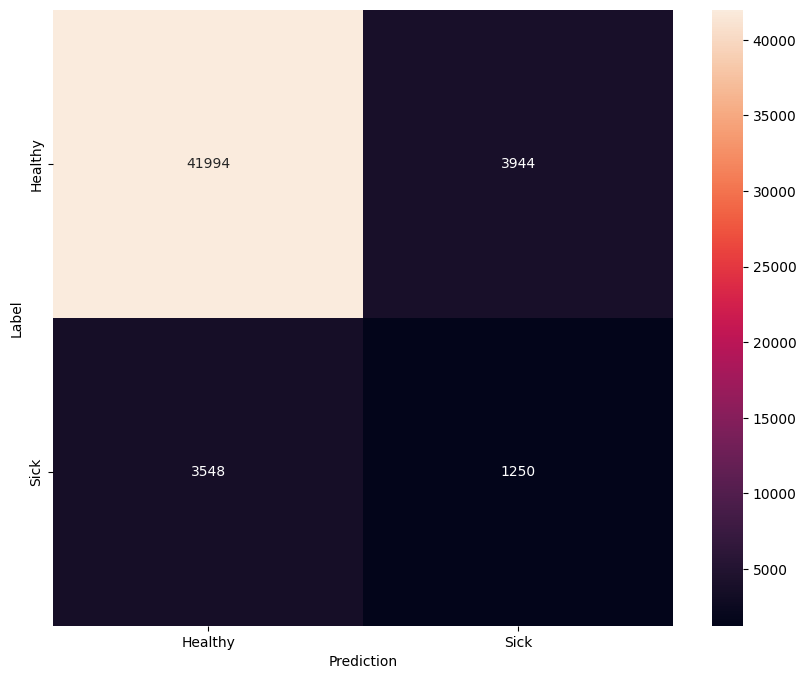

In [44]:
confusion_mtx = tf.math.confusion_matrix(y_test, y_pred)
matriz = confusion_mtx.numpy()
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx,
xticklabels=['Healthy', 'Sick'],
yticklabels=['Healthy', 'Sick'],
annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

Lower accuracy and Lower Bias

In [32]:
# Train the model
model = RandomForestClassifier(n_estimators=100, max_depth=10)

In [33]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [34]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [35]:
# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.907324187953327


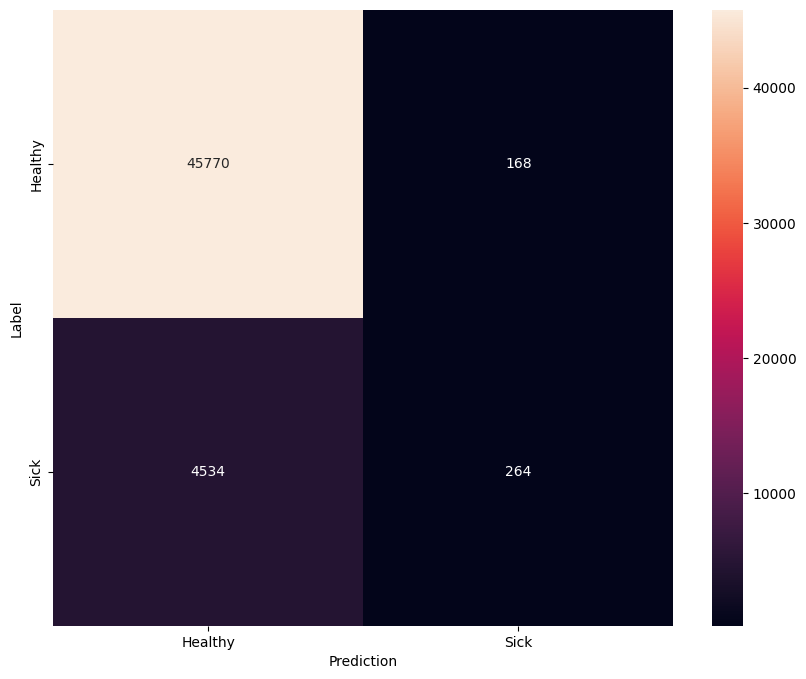

In [36]:
confusion_mtx = tf.math.confusion_matrix(y_test, y_pred)
matriz = confusion_mtx.numpy()
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx,
xticklabels=['Healthy', 'Sick'],
yticklabels=['Healthy', 'Sick'],
annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()